Feature Matching

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
reeses = cv2.imread('puffs_image.png', 0)

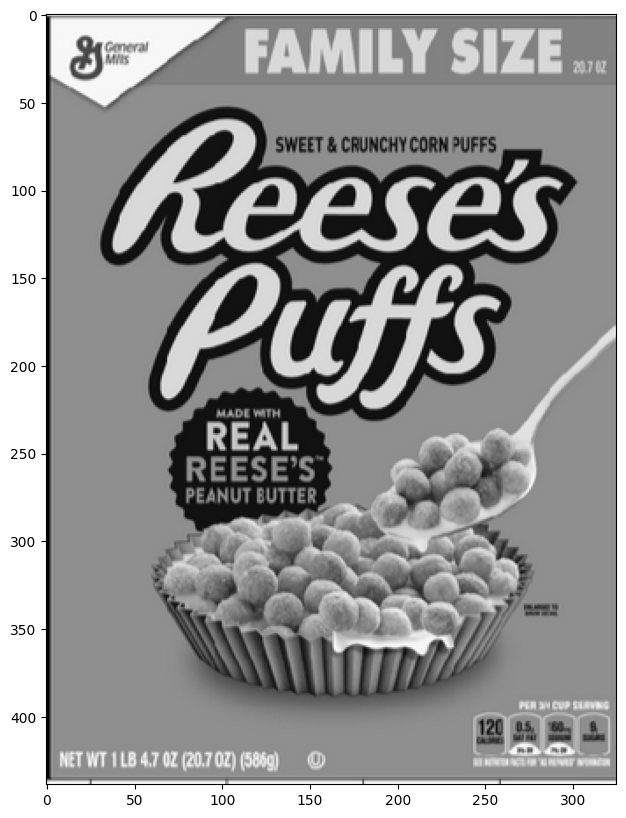

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('many_carels.png', 0)

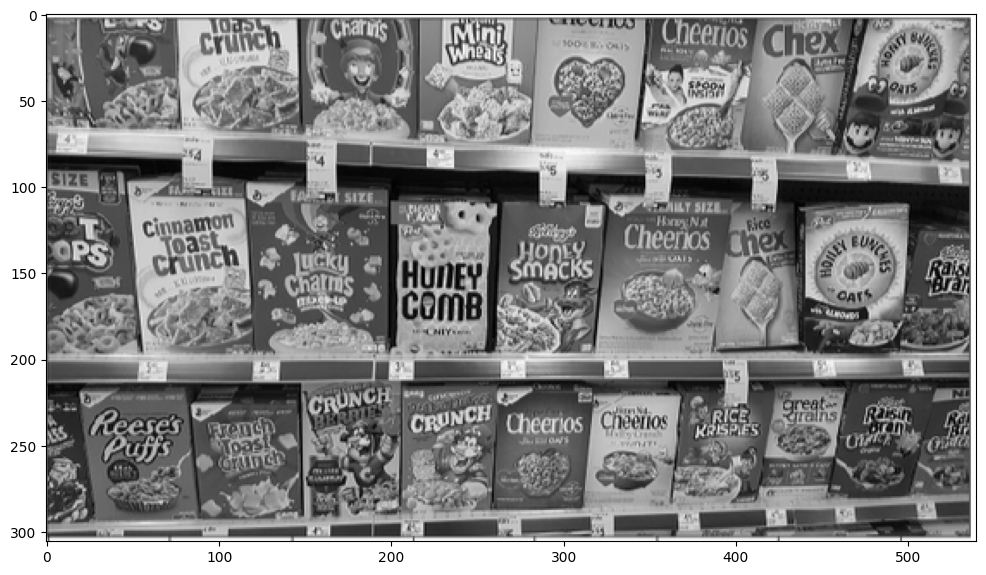

In [6]:
display(cereals)

Brute Force Detection with ORB Description

In [14]:
# Initial ORB detector 
orb = cv2.ORB_create()

# find the keypoints and description with ORB 
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

# create BFMAtcher objects 
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descpriptor
matches = bf.match(des1, des2)

# Sort them in the order of their distance 
matches = sorted(matches, key=lambda  x:x.distance)

# Draw first 25 matches
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

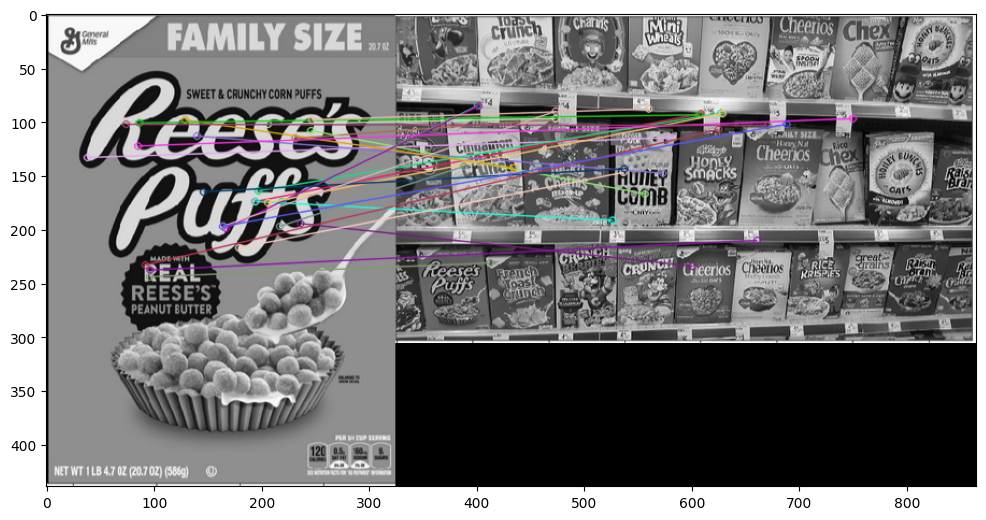

In [15]:
display(reeses_matches)

Brute-Force Matching with SIFT Descriptors and Ratio Test

In [20]:
# Create SIFT objects
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

#BFMatchers with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

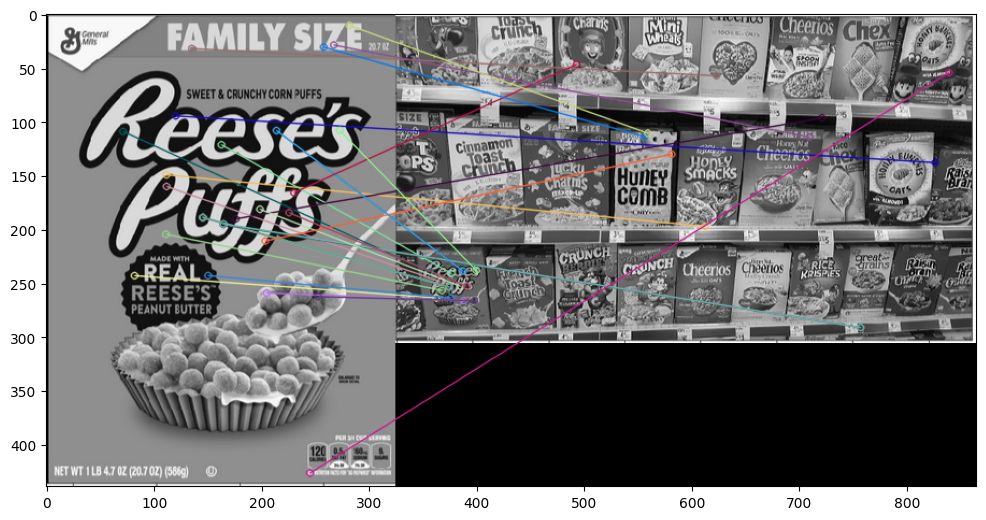

In [21]:
display(sift_matches)

FLANN based Matcher

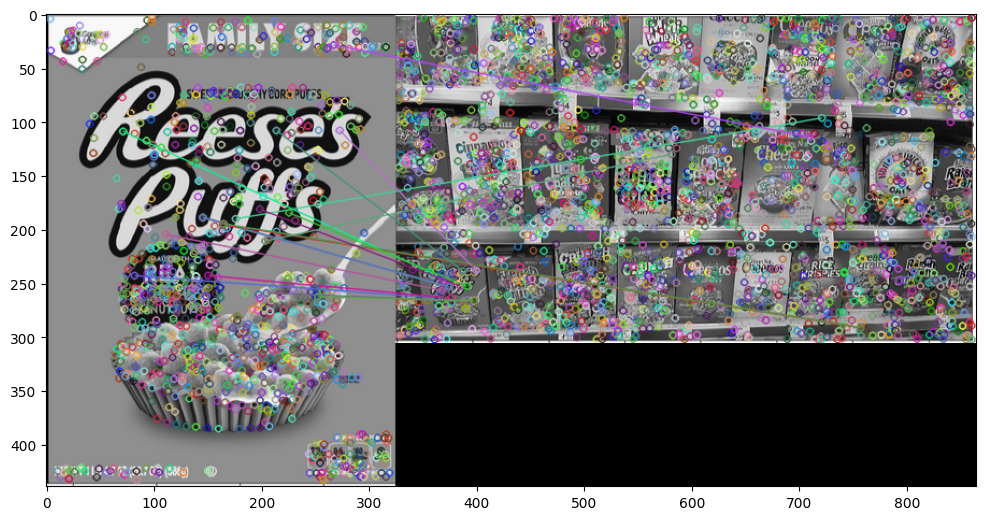

In [29]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)

display(flann_matches)

In [38]:
# Initiate SIFT detector 
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

# FlaNN parameter 
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

#Need to draw only good matches, so ceate a mask 
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test 
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
    
draw_params = dict(matchColor = (0, 255, 0), 
                   singlePointColor= (255,0,0),
                   matchesMask = matchesMask, 
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

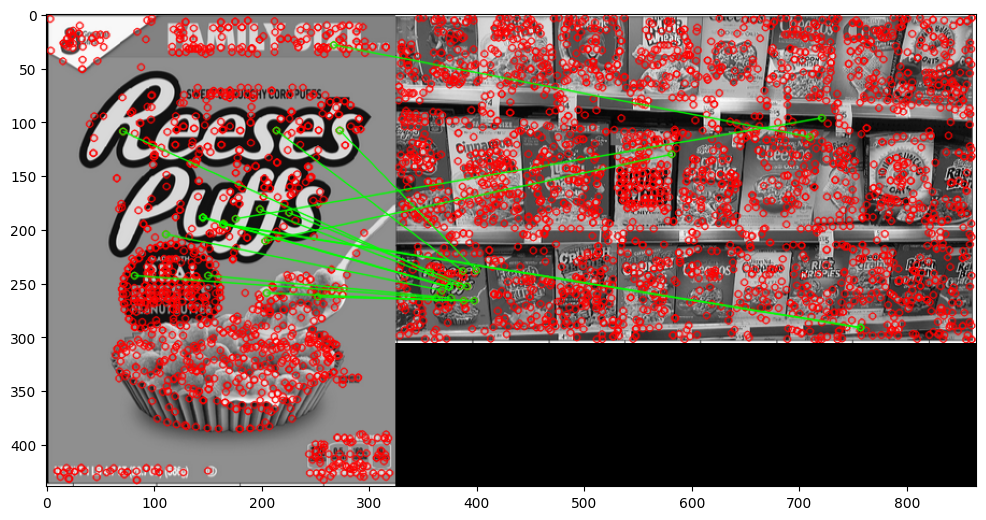

In [39]:
display(flann_matches)

In [40]:
# Done